# Simple aggregation example

Download some ERA5 2m temperature data and calculate the daily mean, min and max

In [1]:
import cads_toolbox as ct
import matplotlib.pyplot as plt
ct.config.USE_CACHE=True

In [2]:
Data = ct.catalogue.retrieve(
    "reanalysis-era5-single-levels", {
        'variable': '2m_temperature',
        'product_type': 'reanalysis',
        'year': '2022',
        'month': '10',
        'day': [f'{dy:02d}' for dy in range(1,32)],
        'time': [f'{hr:02d}:00' for hr in range(24)],
        'grid': '3/3'
    }
)
Data

In [7]:
dir(ct.analysis.aggregate.aggregate)


['ALLOWED_LIBS',
 'HOW_DICT',
 'WEIGHT_DICT',
 '_BIN_MAXES',
 '_PANDAS_FREQUENCIES',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dropna',
 '_groupby_bins',
 '_groupby_time',
 '_pandas_frequency_and_bins',
 'daily_max',
 'daily_mean',
 'daily_min',
 'monthly_mean',
 'reduce',
 'resample',
 'rolling_reduce',
 'xr']

In [5]:
daily_mean = ct.analysis.daily_mean(Data).assign_attrs({'long_name': 'Daily mean temperature'})
daily_min = ct.analysis.aggregate.daily_min(Data).assign_attrs({'long_name': 'Daily minimum temperature'})
daily_max = ct.analysis.daily_max(Data).assign_attrs({'long_name': 'Daily maximum temperature'})

AttributeError: module 'coucal' has no attribute 'daily_min'

(3,)


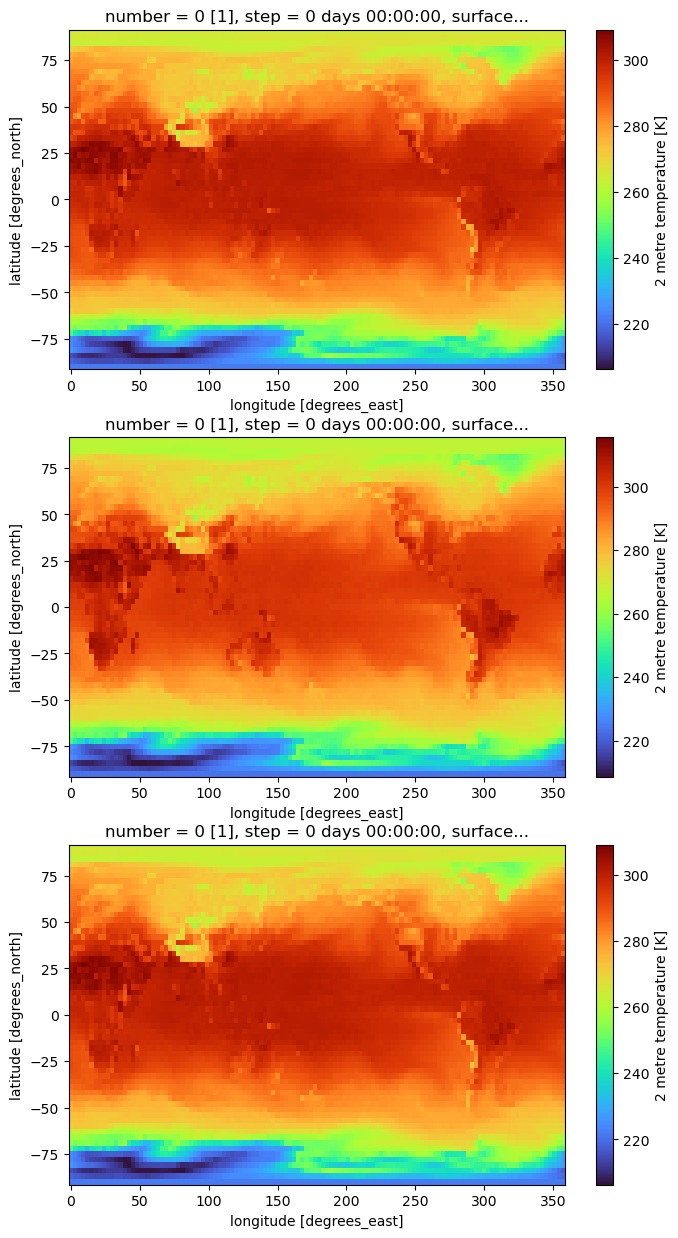

In [ ]:
plot_date = '2022-10-01'
fig, axes = plt.subplots(3,1, figsize=(8,15))
print(axes.shape)
for i, data in enumerate([daily_mean, daily_max, daily_min]):
    day_data = data.sel(time=plot_date)
    day_data.t2m.plot(ax=axes[i], cmap='turbo')
